<div style="display: flex; align-items: center;">
    <div style="flex: 1;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/a/a3/The_logo_of_Jacobs_Engineering_Group.png" alt="Company Logo" style="width: 150px;">
        <p><strong>Project:</strong> Wind turbine foundations<p>
        <p><strong>Subject:</strong> Concept design<p>
    </div>
</div>

<table>
  <tr>
    <th>Created by</th>
    <th>Checked by</th>
    <th>Approved by</th>
    <th>Date created</th>
    <th>Date checked</th>
    <th>Date approved</th>
  </tr>
  <tr>
    <td>Andrew Mountjoy</td>
    <td>TBC</td>
    <td>TBC</td>
    <td>dd-mm-yyyy</td>
    <td>dd-mm-yyyy</td>
    <td>dd-mm-yyyy</td>
  </tr>
</table>

REMAINING:
- Ducts on sketch?
- Add explanations
- Automated report
- Drawing output

The notebook uses the WTF_Concept Python module to carry out initial wind turbine gravity foundation sizing and checks for concept design.

In [4]:
%load_ext autoreload
%autoreload 2

Import WTF concept design module and create an instance of the design class:

In [6]:
import WTF_Concept

In [7]:
wf = WTF_Concept.WTF_Concept_Design()
util = WTF_Concept.Utilities()

## Material properties

Enter material properties:

In [10]:
wf.mat_prop_input()

## Loading

Read in the manufacturer's loadcases, first for the enveloped results without partial factors (to be used for turbine manufacturer checks) and then for the enveloped results with partial factors (to be used for the ULS verifications):

In [321]:
LCs_wout_pf = wf.read_LCs(filename = "Loadcases_env_wout_factor.csv")

LCs_wout_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m)
Loadcase,,,,,,
Mx_Max,6891.29,1526.58,2525.02,176622.72,1,0.55
Mx_Min,6897.52,1638.50,-2801.73,167538.33,1,0.55
My_Max,7117.85,1280.97,1817.12,168481.43,1,0.55
My_Min,6944.34,870.90,749.24,119797.52,1,0.55
Mxy_Max,6706.11,1633.59,4581.85,182331.93,1,0.55
Mxy_Min,7213.88,65.81,-605.33,7.49,1,0.55
Mz_Max,7013.75,1008.29,13465.39,118777.58,1,0.55
Mz_Min,6911.55,814.27,-16345.30,85991.11,1,0.55
Fx_Max,6783.59,1593.68,-6789.03,153173.07,1,0.55


In [323]:
LCs_w_pf = wf.read_LCs(filename = "Loadcases_env_w_factor.csv")

LCs_w_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m)
Loadcase,,,,,,
Mx_Max,7136.859259,1396.437037,3838.162963,162817.548100,1.35,0.55
Mx_Min,7049.333333,1507.051852,-4416.444444,167601.281500,1.35,0.55
My_Max,7078.837037,1236.733333,955.762963,159948.651900,1.35,0.55
My_Min,6944.336364,870.900000,749.245455,119797.518200,1.10,0.55
Mxy_Max,7056.674074,1443.896296,4606.970370,166755.400000,1.35,0.55
Mxy_Min,7213.881818,65.809091,-605.327273,7.490909,1.10,0.55
Mz_Max,7387.851852,658.392593,12183.881480,73915.444440,1.35,0.55
Mz_Min,6911.545455,814.272727,-16345.300000,85991.109090,1.10,0.55
Fx_Max,7189.251852,1235.362963,-3790.355556,154382.740700,1.35,0.55


Apply the climate change multiplier to wind speed, $M_c = 1.05$:

In [326]:
LCs_wout_pf.iloc[:,1:4] = LCs_wout_pf.iloc[:,1:4] * 1.05**2

LCs_wout_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m)
Loadcase,,,,,,
Mx_Max,6891.29,1683.054450,2783.834550,194726.548800,1,0.55
Mx_Min,6897.52,1806.446250,-3088.907325,184711.008825,1,0.55
My_Max,7117.85,1412.269425,2003.374800,185750.776575,1,0.55
My_Min,6944.34,960.167250,826.037100,132076.765800,1,0.55
Mxy_Max,6706.11,1801.032975,5051.489625,201020.952825,1,0.55
Mxy_Min,7213.88,72.555525,-667.376325,8.257725,1,0.55
Mz_Max,7013.75,1111.639725,14845.592475,130952.281950,1,0.55
Mz_Min,6911.55,897.732675,-18020.693250,94805.198775,1,0.55
Fx_Max,6783.59,1757.032200,-7484.905575,168873.309675,1,0.55


In [328]:
LCs_w_pf.iloc[:,1:4] = LCs_w_pf.iloc[:,1:4] * 1.05**2

LCs_w_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m)
Loadcase,,,,,,
Mx_Max,7136.859259,1539.571833,4231.574667,179506.346780,1.35,0.55
Mx_Min,7049.333333,1661.524667,-4869.130000,184780.412854,1.35,0.55
My_Max,7078.837037,1363.498500,1053.728667,176343.388720,1.35,0.55
My_Min,6944.336364,960.167250,826.043114,132076.763816,1.10,0.55
Mxy_Max,7056.674074,1591.895666,5079.184833,183847.828500,1.35,0.55
Mxy_Min,7213.881818,72.554523,-667.373318,8.258727,1.10,0.55
Mz_Max,7387.851852,725.877833,13432.729332,81491.777495,1.35,0.55
Mz_Min,6911.545455,897.735682,-18020.693250,94805.197772,1.10,0.55
Fx_Max,7189.251852,1361.987667,-4178.867000,170206.971622,1.35,0.55


Relevant load combinations are as follows:

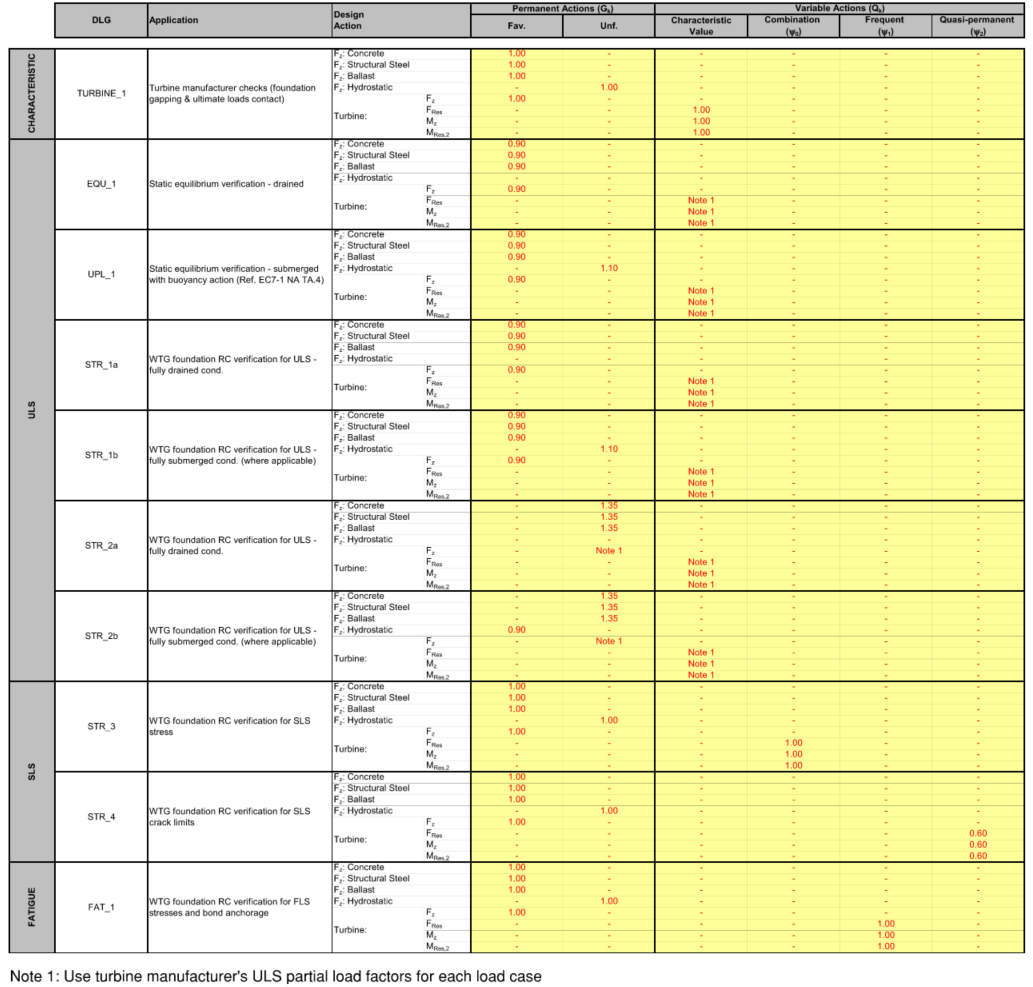

In [331]:
util.disp_image('combinations.png')

## Geometry

The base diameters of the proposed turbines are 4.45m, 4.77m, 4.95m and 5.95m as shown below:

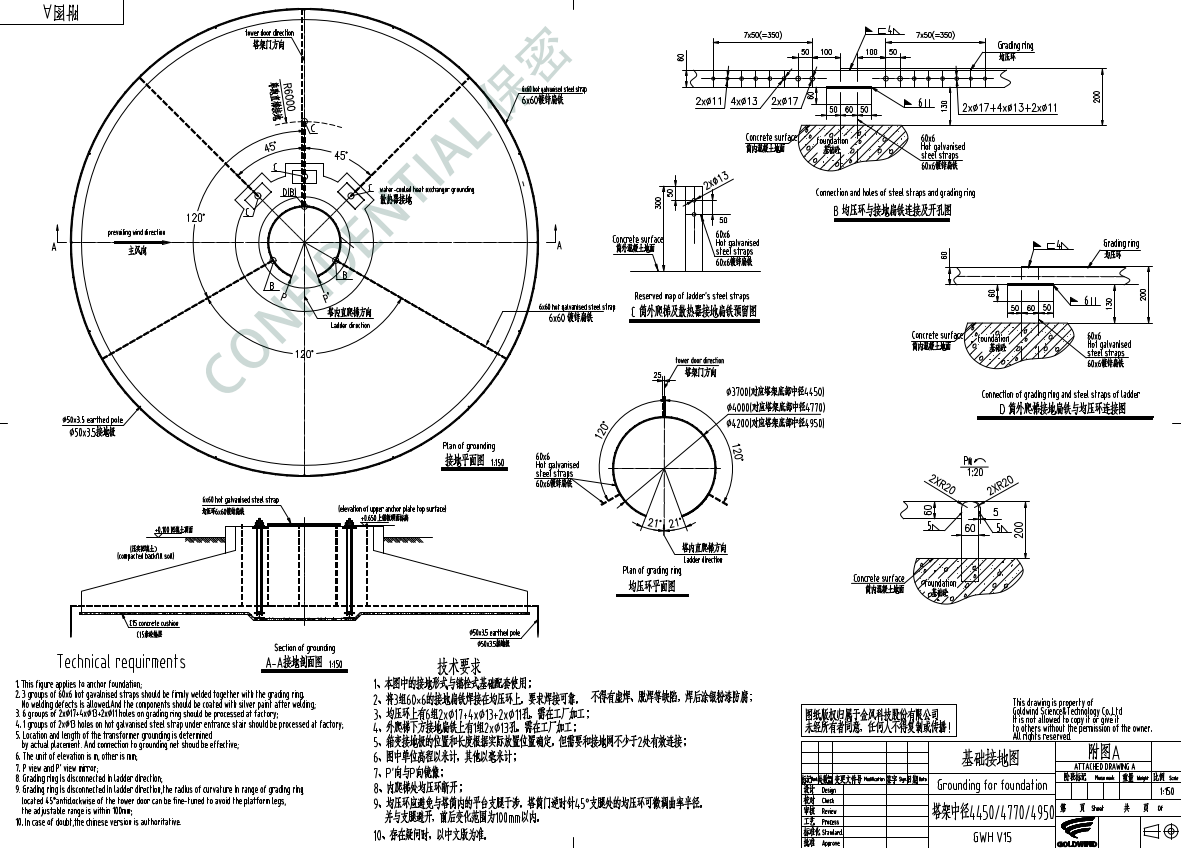

In [335]:
util.disp_image("Base diameter 4450_4770_4950.png")

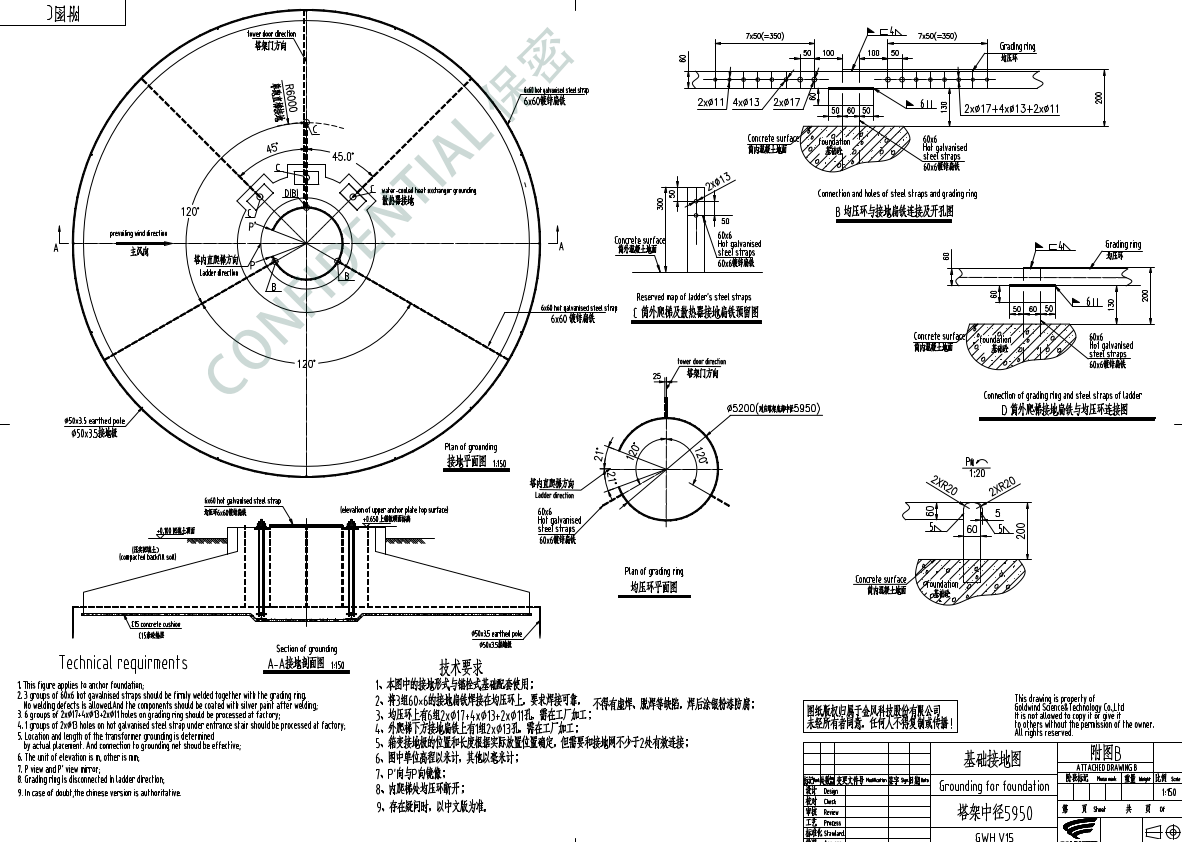

In [337]:
util.disp_image("Base diameter 5950.png")

## Geometry optimisation

We shall fix the diameter of the pedestal and downstand, as well as the height of the downstand, to accommodate the turbine and holdind down bolt assembly. We can run an optimisation alogorithm to find the other parameters, minimising the total volume of concrete:

In [ ]:
optimal, df_results = wf.optimise_foundation_geometry_parallel(LCs_wout_pf = LCs_wout_pf, LCs_w_pf = LCs_w_pf,    # Loading inputs
                                                               d1_min=25, d1_max=40, d_1_steps=100,    # Base diameter search range & resolution
                                                               h1_min=0.1, h1_max=2.5, h_1_steps=100,    # Base height search range & resolution
                                                               h2_min=1, h2_max=3, h_2_steps=100,    # Haunch height search range & resolution
                                                               h3_min=0.1, h3_max=1.0, h_3_steps=50, # Pedestal height search range & resolution
                                                               d2=7, b=7, h4=0.55, h5=0.15,    # Pedestal dia., downstand dims. & FGL fixed
                                                               h1_h2_thk_tol = 0.75,    # Tolerance around min. base + haunch thickness
                                                               theta_min_deg=6, theta_max_deg=12    # Range of acceptable haunch angles
                                                              )

Optimising geometry:  75%|█████████████████████████████████████▍            | 4250664/5685000 [43:02<43:39, 547.52it/s]

In [105]:
optimal1, df_results1 = wf.optimise_foundation_geometry_parallel(LCs_wout_pf = LCs_wout_pf, LCs_w_pf = LCs_w_pf, 
                                                               d1_min=30, d1_max=35, d_1_steps=20,
                                                               h1_min=1, h1_max=2.5, h_1_steps=20,
                                                               h2_min=2, h2_max=3, h_2_steps=20,
                                                               h3_min=0.5, h3_max=1.0, h_3_steps=10,
                                                               d2=7, b=7, h4=0.55, h5=0.15,
                                                               h1_h2_thk_tol = 0.75,
                                                               theta_min_deg=2, theta_max_deg=12
                                                              )

Optimising geometry: 100%|██████████████████████████████████████████████████████| 48240/48240 [00:53<00:00, 903.38it/s]


In [ ]:
print(optimal)
#print(optimal1)

In [ ]:
figs = wf.visualise_design_space(df_results.iloc[::50,:], optimal) #Note the resampled dataset
for fig in figs:
    fig.show()

In [ ]:
figss = wf.visualise_design_space_frontier(df_results, optimal) #Note the resampled dataset
for fig in figs:
    fig.show()

## Manual intervention

In [ ]:
wf.interactive_foundations(d1_init=optimal['d1'], 
                           d2_init=optimal['d2'], 
                           h1_init=optimal['h1'], 
                           h2_init=optimal['h2'], 
                           h3_init=optimal['h3'],
                           h4_init=optimal['h4'],
                           h5_init=optimal['h5'],
                           b_init=optimal['b'],
                           hwt_init=optimal['hwt']
                          )

In [ ]:
wf.foundation_params

Calculate total resolved moment at the top of the plinth and the bottom of the base slab:

In [ ]:
wf.M_top_bottom(df=LCs_wout_pf, h1=wf.foundation_params['h1'], h2=wf.foundation_params['h2'], h3=wf.foundation_params['h3'], h4=wf.foundation_params['h4'])
LCs_wout_pf

In [ ]:
wf.M_top_bottom(df=LCs_w_pf, h1=wf.foundation_params['h1'], h2=wf.foundation_params['h2'], h3=wf.foundation_params['h3'], h4=wf.foundation_params['h4'])
LCs_w_pf

In [ ]:
Conc_DL = wf.foundation_perm_load(volume = wf.foundation_params['V_c'], density = wf.mat_props['g_concrete'])
Ballast_Sub = wf.foundation_perm_load(volume = wf.foundation_params['V_h_f'] + wf.foundation_params['V_p_f'], density = wf.mat_props['g_ballast_wet'])
Hydrostatic_Uplift = wf.foundation_perm_load(volume = wf.foundation_params['V_w'], density = wf.mat_props['g_water'])

print(f'The vertical load from the foundation concrete is {Conc_DL:.2f}kN')
print(f'The vertical load from the fill is {Ballast_Sub:.2f}kN')
print(f'The vertical load from buoyancy is {Hydrostatic_Uplift:.2f}kN')

## Turbine manufacturer checks

### Foundation gapping

Check there is no loss of contact (i.e. 'inactive area') between the underside of base and the formation. The eccentricity limit is given as R/4.

In [ ]:
no_gapping = wf.no_gapping(d1 = wf.foundation_params['d1'], 
                           M_Res = LCs_wout_pf['M_Res Bottom of Slab (kNm)'],
                           F_z_turb = LCs_wout_pf['Axial (kN)'],
                           F_z_found = Conc_DL + Ballast_Sub + Hydrostatic_Uplift,
                           R_ratio = 4
                          )

no_gapping

### Ultimate loads ground contact

Check that not more than 50% of the base is without compression. For circular bases, the eccentricity limit is given as 0.59R. 

In [ ]:
ult_load_gc = wf.no_gapping(d1 = wf.foundation_params['d1'], 
                            M_Res = LCs_wout_pf['M_Res Bottom of Slab (kNm)'],
                            F_z_turb = LCs_wout_pf['Axial (kN)'],
                            F_z_found = Conc_DL + Ballast_Sub + Hydrostatic_Uplift,
                            R_ratio = 1/0.59
                           )

ult_load_gc

### Soil bearing pressure

Check that the maximum soil stress at the edge of the foundation is less than the allowable bearing pressure.

In [ ]:
sbp = wf.soil_bearing_pressure(d1 = wf.foundation_params['d1'],
                               M_Res = LCs_wout_pf['M_Res Bottom of Slab (kNm)'],
                               F_z_turb = LCs_wout_pf['Axial (kN)'],
                               F_z_found = Conc_DL + Ballast_Sub + Hydrostatic_Uplift,
                               Theta_allow = 250
                              )

sbp

## ULS static equilibrium checks

### Overturning

Check UPL set for submerged condition:

In [ ]:
overturning = wf.overturning(d1 = wf.foundation_params['d1'],
                          F_z_turb = LCs_w_pf['Axial (kN)'],
                          F_z_found_conc = Conc_DL,
                          F_z_found_steel = 0,
                          F_z_found_ballast = Ballast_Sub,
                          F_z_found_buoyancy = Hydrostatic_Uplift,
                          M_Res = LCs_w_pf['M_Res Bottom of Slab (kNm)'],
                          Q_fact = LCs_w_pf['ULS partial factor'],
                          gamma_G_stb = 0.9,
                          gamma_G_dst = 1.10
                         )

overturning

### Sliding

Check UPL set for submerged condition:

In [ ]:
sliding = wf.sliding(d1 = wf.foundation_params['d1'],
                  phi = wf.mat_props['phi_prime'],
                  F_z_turb = LCs_w_pf['Axial (kN)'],
                  F_z_found_conc = Conc_DL,
                  F_z_found_steel = 0,
                  F_z_found_ballast = Ballast_Sub,
                  F_z_found_buoyancy = Hydrostatic_Uplift,
                  F_Res = LCs_w_pf['Resolved shear (kN)'],
                  M_z = LCs_w_pf['Torsional moment (kNm)'],
                  M_Res = LCs_w_pf['M_Res Bottom of Slab (kNm)'],
                  Q_fact = LCs_w_pf['ULS partial factor'],
                  gamma_G_stb = 0.9,
                  gamma_G_dst = 1.10,
                  lambda_phi = 1.25
                 )

sliding